# <center>ANALYSIS ON VARIANT PRICES OF BOOKS BASED ON THEIR CATEGORIES

<h3><center> Part 2:   Data Analysis  </center></h3>

<h3>Brief Description</h3>

The Dataset in used for this analysis was gotten from an hosted competition in www.machinehack.com, the objective of the competition is to build a machine learnig model to predict the price of books based on a given set of features. these books are of different genres, from thousand of authors

Welcome to the part 2 of this analysis. I have been able to clean and handle missing values on the data cleaning notebook, if you haven't checked that out, you can do that before your continue.

This notebook focuses on data analysis(answering some spelt out questions) and data visualization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('new_train.csv')
test = pd.read_csv('new_test.csv')
train.head(3)

,Title,Author,BookCategory,Price,date_of_edition,book_cover_type,review_rate,readers_rating,year,month
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,Action & Adventure,220.00,2016-03-10 00:00:00,Paperback,4.0,8,2016.0,3.0
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Biographies, Diaries & True Accounts",202.93,2012-11-07 00:00:00,Paperback,3.9,1,2012.0,11.0
2,Leviathan (Penguin Classics),Thomas Hobbes,Humour,299.00,1982-02-25 00:00:00,Paperback,4.8,6,1982.0,2.0


### Analysis on the Price(target Variable) column

Question: 
          <li>what is the highest and lowest price of the books provided?</li>
          <li>Who are the author of the book with the highest and lowest price?</li>
          <li>what book category do this books belong to?</li>
          
Note: there are many questions you can answer around the price column, feel free to explore more. on this column am sticking to the 3 questions stated above

In [3]:
max_price = train.loc[:, 'Price'].max()
min_price = train.loc[:, 'Price'].min()
print('the minimum book price is {} , and the maximun price is {}'.format(min_price, max_price))

the minimum book price is 25.0 , and the maximun price is 14100.0


In [4]:
min_author = train[train['Price'] == 25.0]
max_author = train[train['Price'] == 14100.0]


In [5]:
print("The Authors of the book with the lowest price are \n")
min_author.iloc[:,[1,2]]

The Authors of the book with the lowest price are 



,Author,BookCategory
418,Maple Press,"Arts, Film & Photography"
5068,RPH Editorial Board,"Biographies, Diaries & True Accounts"


In [6]:
print("The Author of the book with the highest price is \n")
max_author.iloc[:,[1,2]]

The Author of the book with the highest price is 



,Author,BookCategory
2455,Rene Goscinny,Comics & Mangas


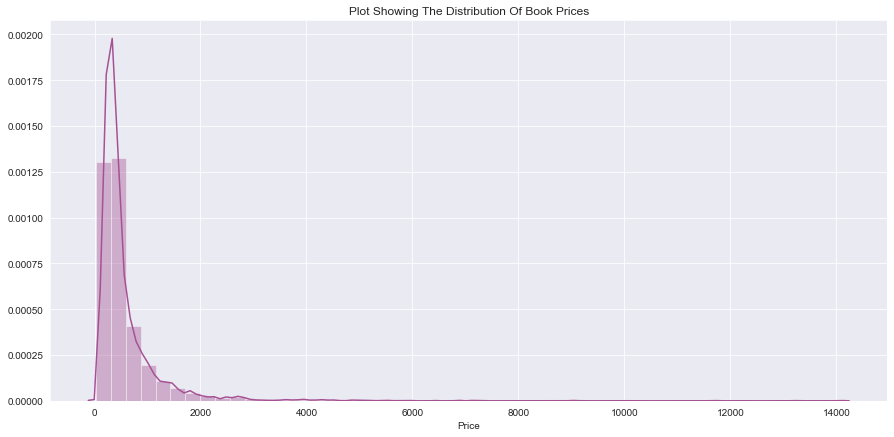

In [7]:
plt.rcParams['figure.figsize'] = [15,7]
sns.set_style('darkgrid')
sns.set_palette('tab20b_r')
sns.distplot(train['Price'], kde = True,);
plt.title('Plot Showing The Distribution Of Book Prices');

From the above histogram plot, the distribution of book prices appears to be rightly skewed, with prices clustered around 0 to 2000, and also having few numbers of prices above this range.

### Analysis on the book Category

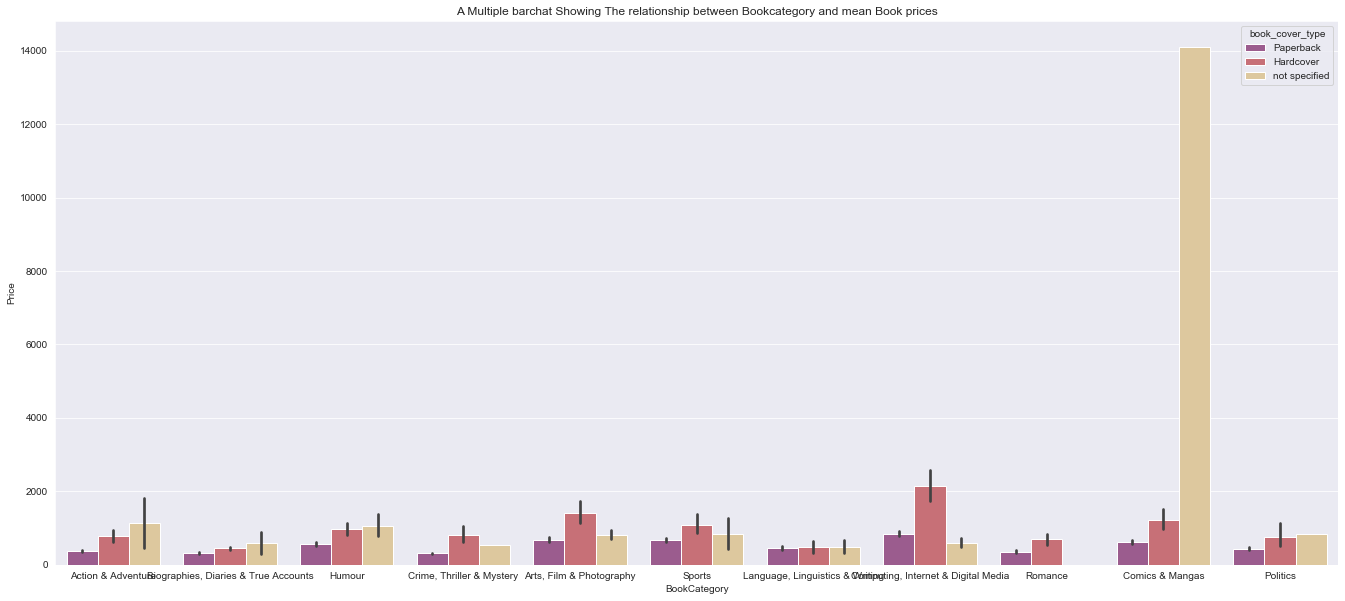

In [8]:
plt.rcParams['figure.figsize']=(23,10)
sns.set_palette('tab20b_r')
sns.barplot('BookCategory', 'Price', hue= 'book_cover_type', data = train);
plt.title('A Multiple barchat Showing The relationship between Bookcategory and mean Book prices');

From the above barchat, acessing each book categories and their cover type, i noticed that books with hardcover type tends to have high prices when compared with the books with paperback cover type. excluding the non specified book cover type category, cos this was adopted, since it was a missing value.

And Also we can take note of the obvious outlier in comics and mangas categories

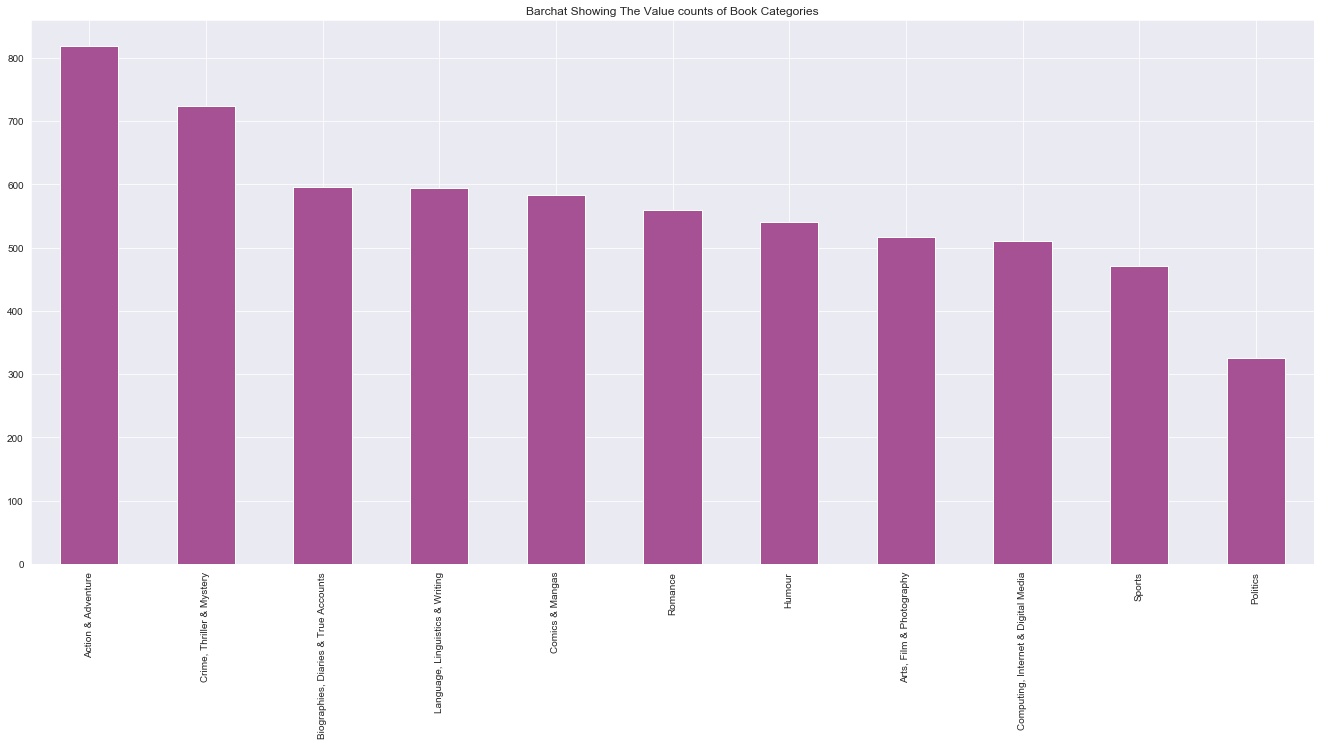

In [9]:
train.BookCategory.value_counts().plot(kind = 'bar');
plt.title('Barchat Showing The Value counts of Book Categories');

we can see that the two dominant book category appears to be <b>"Action & Adventure"</b> and <b>"Crime, Thriller & Mystery"</b>

In [10]:
#hard_cover_and_action = (train['BookCategory'] == 'Action & Adventure') & (train['book_cover_type'] == 'Paperback')
#train[hard_cover_and_action]

### Correlation

for this section, i'm intrested in checking if there is correlation between all numeric features and book prices.

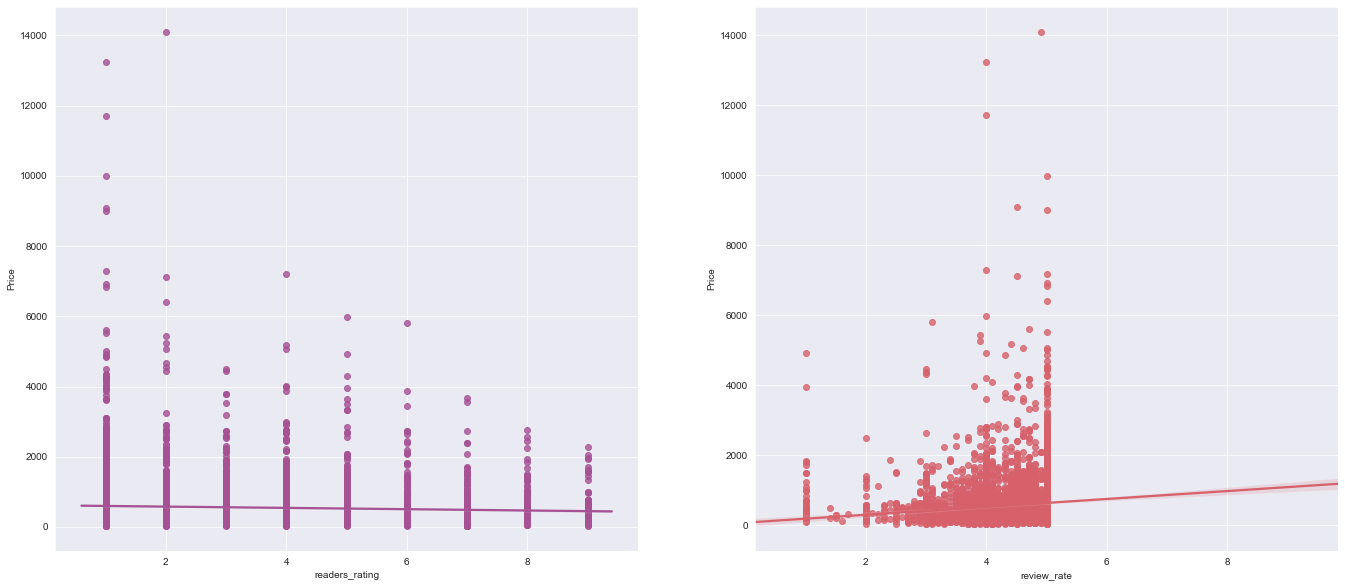

In [11]:
fig, axs = plt.subplots(ncols = 2, sharex=True, sharey=False)
sns.regplot('readers_rating', 'Price', data = train, ax = axs[0])
sns.regplot('review_rate', 'Price', data = train, ax = axs[1]);

In [12]:
train.corr()['Price']

Price             1.000000
review_rate       0.108373
readers_rating   -0.061770
Name: Price, dtype: float64

From the above display, we can see that there is no obvious correlation, as point on the scatter plot appeared clustered, with no specific positive or negative trend

### Analysis on the Year of Book Launch

For this section, we want to see if the year a book was launched can influence the pricing of the book. we would do this comparing the year of book launch with the pricing of the book.

In [13]:
def bin_year(x):
    if x in ['1960.0', '1961.0', '1962.0', '1963.0', '1964.0', '1965.0', '1966.0', '1967.0', '1968.0', '1969.0']:
        return "1960's"
    elif x in ['1970.0', '1971.0', '1972.0', '1973.0', '1974.0', '1975.0', '1976.0', '1977.0', '1978.0', '1979.0']:
        return "1970's"
    elif x in ['1980.0', '1981.0', '1982.0', '1983.0', '1984.0', '1985.0', '1986.0', '1987.0', '1988.0', '1989.0']:
        return "1980's"
    elif x in ['1990.0', '1991.0', '1992.0', '1993.0', '1994.0', '1995.0', '1996.0', '1997.0', '1998.0', '1999.0']:
        return "1990's"
    else:
        return "2000's"

In [14]:
train['year_class'] = train['year'].apply(bin_year)
train.head(2)

,Title,Author,BookCategory,Price,date_of_edition,book_cover_type,review_rate,readers_rating,year,month,year_class
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,Action & Adventure,220.00,2016-03-10 00:00:00,Paperback,4.0,8,2016.0,3.0,2000's
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Biographies, Diaries & True Accounts",202.93,2012-11-07 00:00:00,Paperback,3.9,1,2012.0,11.0,2000's


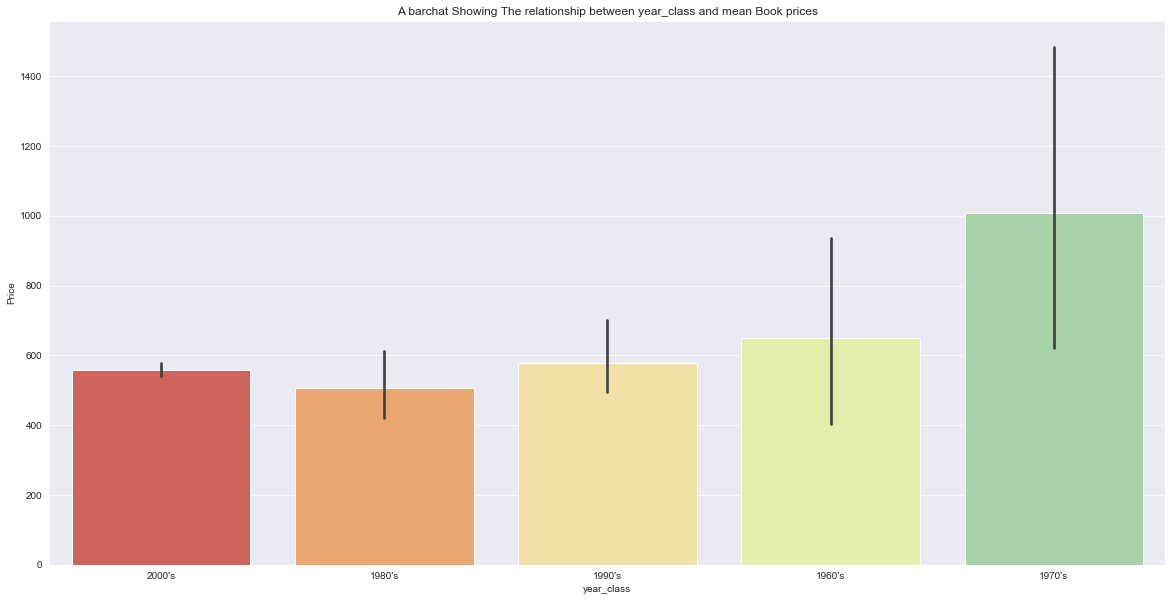

In [15]:
plt.rcParams['figure.figsize'] = (20,10)
sns.set_palette('Spectral')
sns.barplot(train['year_class'], train['Price']);
plt.title('A barchat Showing The relationship between year_class and mean Book prices');

From the above bar chat, we can deduce that book editions in year_class 1970's and 1960's  are books with high mean price tag, when compared with other year_class

## <center>Summary</center>

<b>Note:</b>  Further Explanatory Analysis can be carried to get proper insights from the data, before conducting a predictive analysis.
These are just few of what i can drop here at the moment, feel free to share with me what you have done if eventually you get you hands busy with the datset.

Part 3: of this project would be centered aroud Model Building (Predictive Analysis)